In [12]:
from block_ai.lib.myblokus.game_engine import GameEngine
from block_ai.lib.myblokus.game import Game, GameEnd
from block_ai.lib.myblokus.agent import PointAgent

import itertools
import numpy as np
from tqdm import tqdm_notebook
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

In [2]:
ge = GameEngine(players=['point', 'random', 'random', 'random'])
ge.play_game()

Analizing 54 moves:
10
20
30
40
50
Analizing 254 moves:
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Analizing 547 moves:
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
Analizing 946 moves:
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
Analizing 1083 moves:
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560


In [6]:
ge.game.get_scores()

{0: 10, 1: 23, 2: 29, 3: 35}

In [19]:
ge2 = GameEngine(players=['greedy', 'random', 'random', 'random'])

In [20]:
ge2.play_game()

In [21]:
ge2.game.get_scores()

{0: 8, 1: 42, 2: 23, 3: 31}

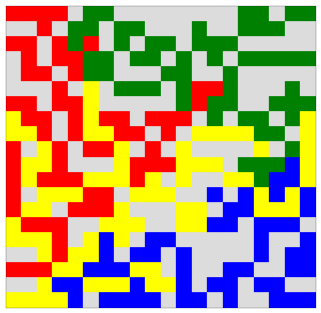

In [7]:
ge.game.display()

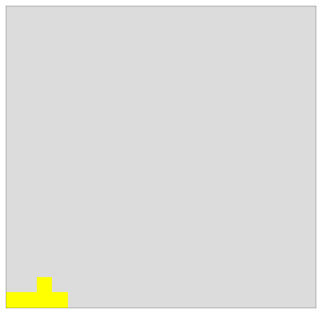

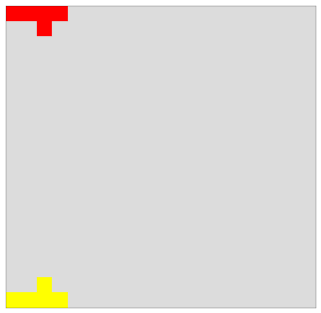

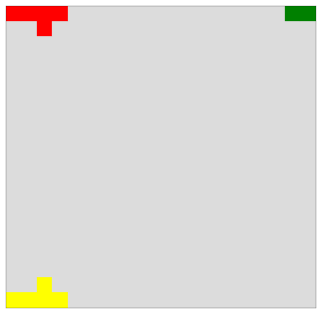

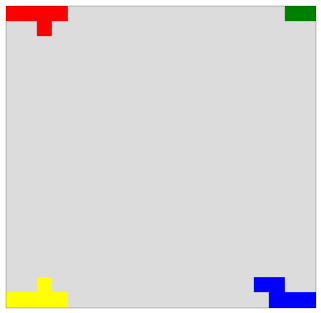

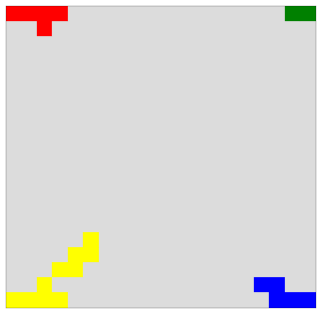

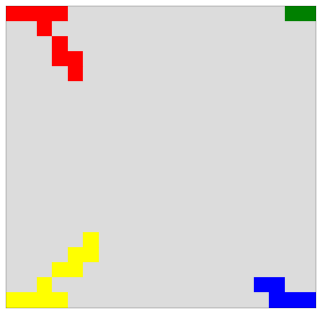

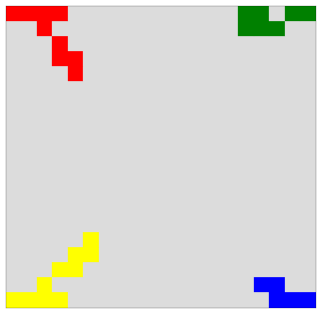

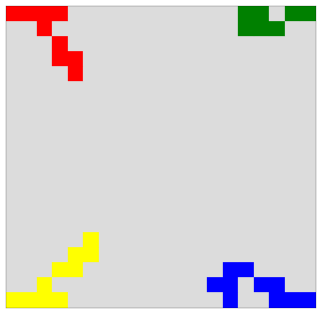

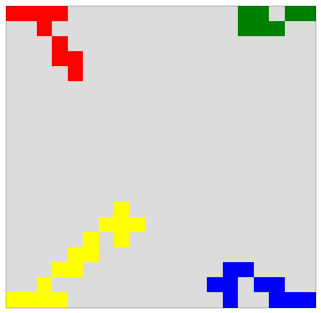

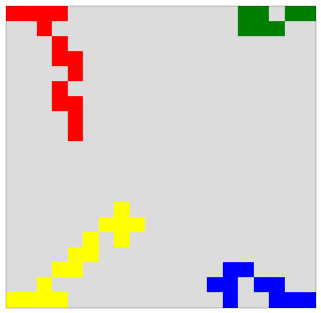

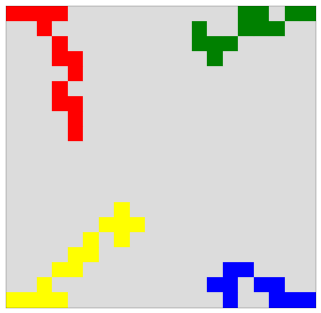

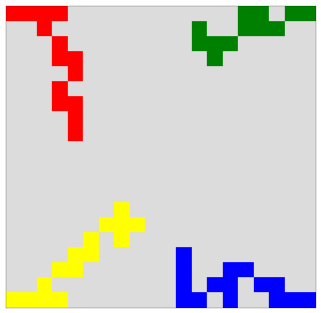

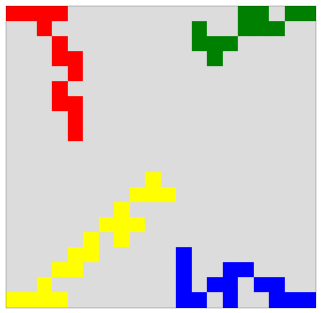

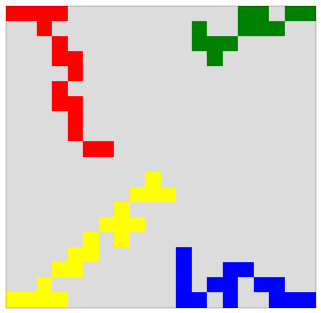

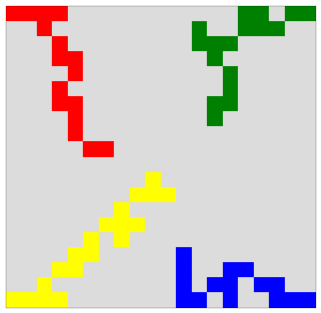

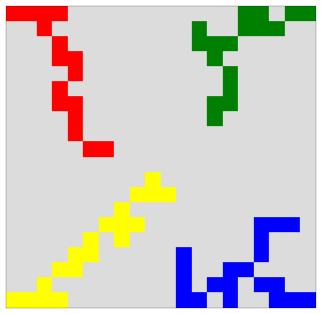

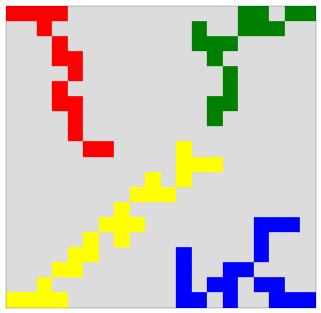

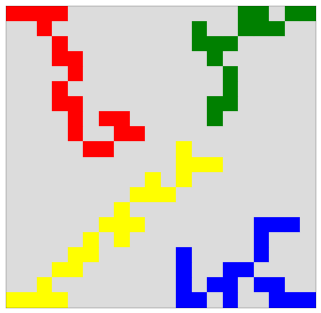

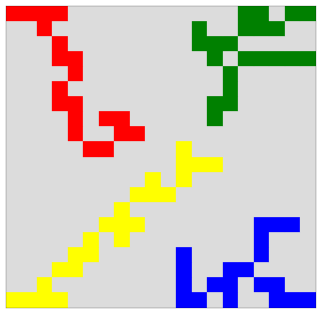

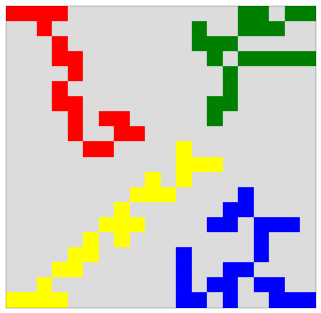

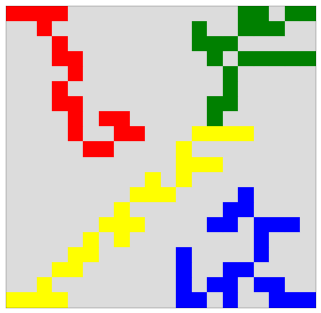

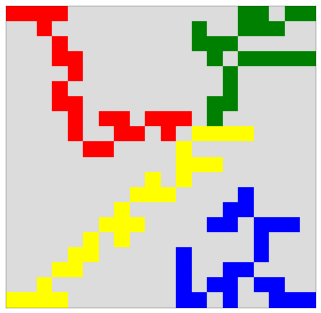

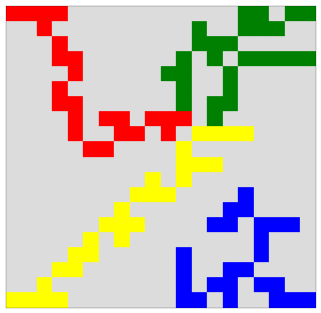

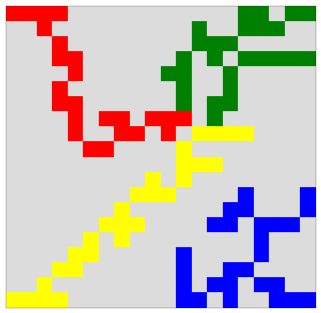

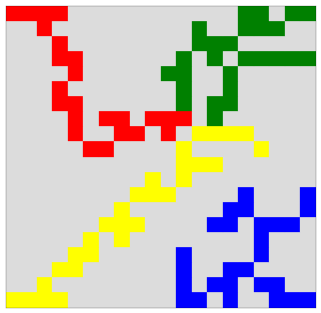

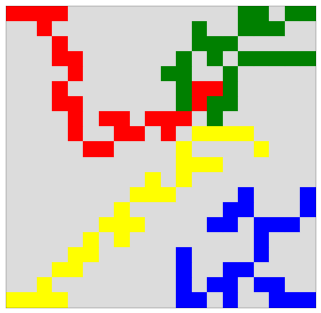

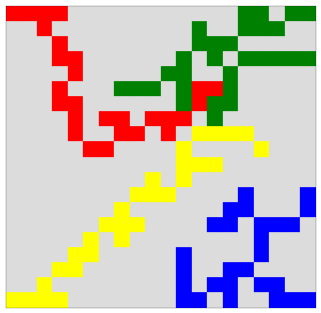

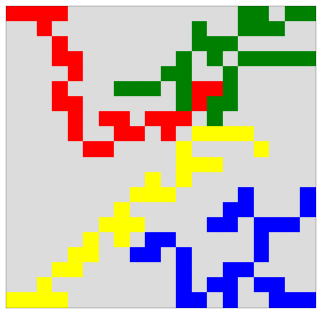

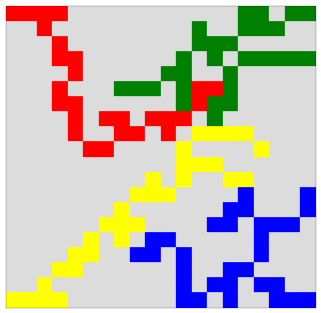

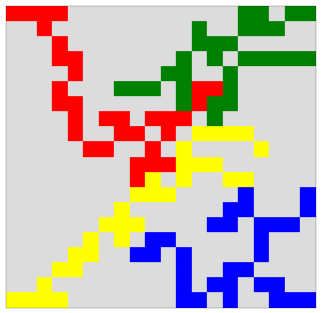

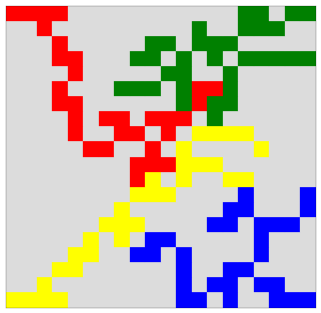

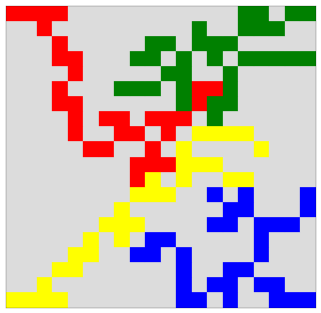

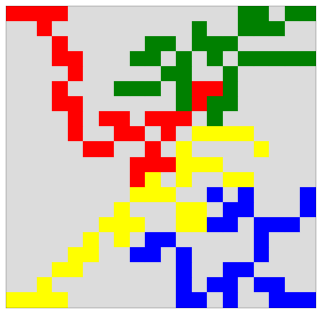

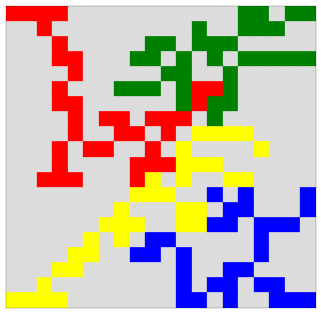

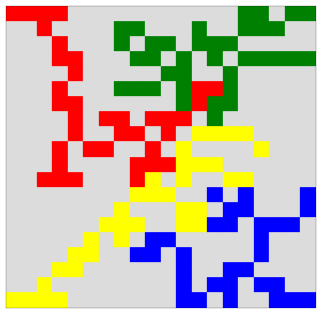

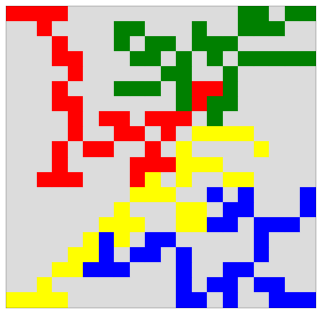

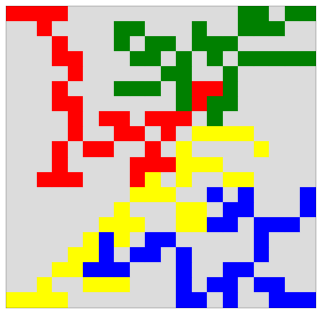

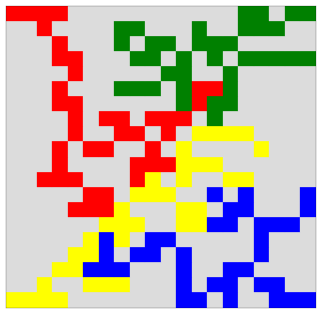

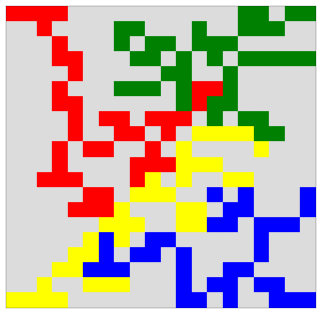

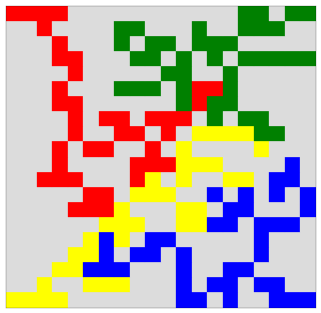

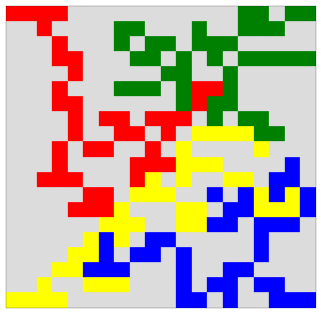

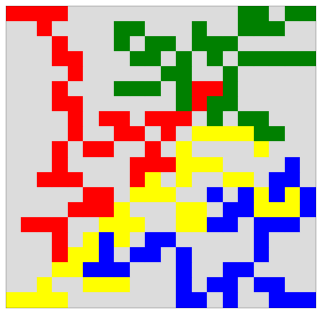

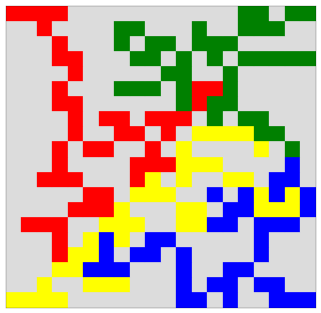

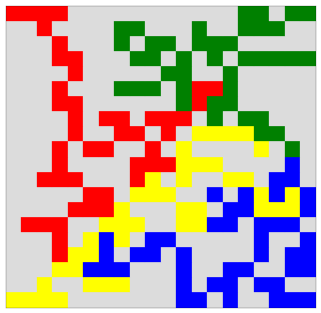

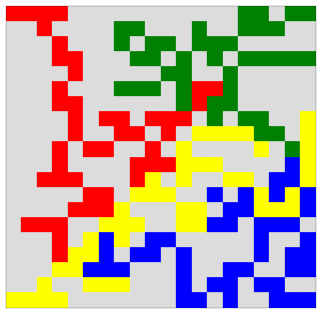

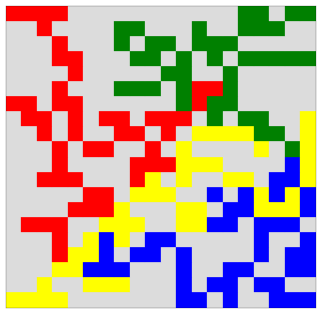

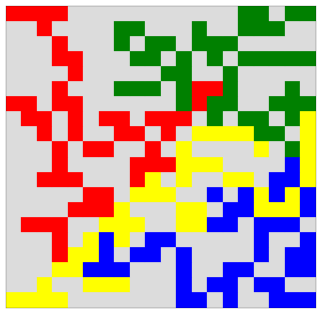

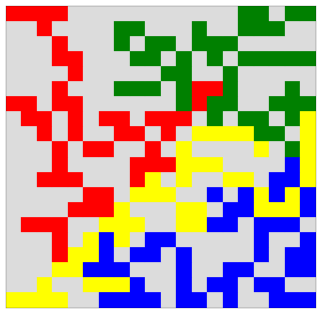

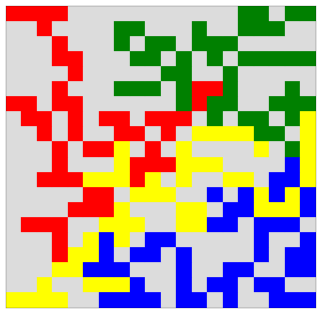

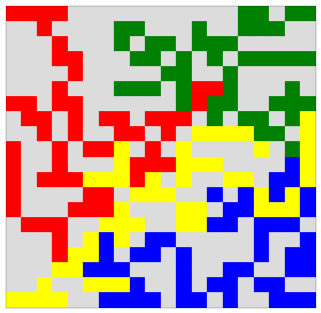

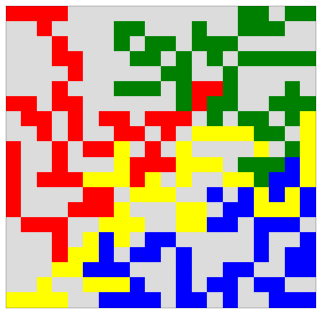

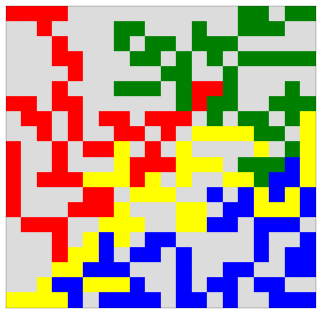

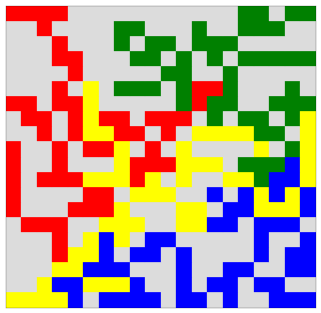

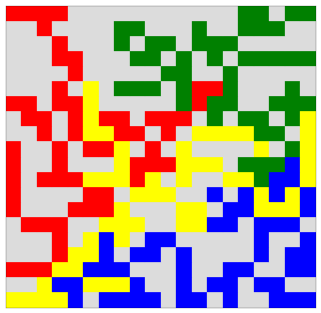

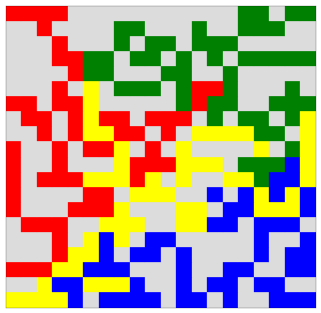

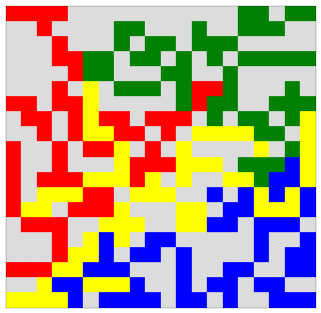

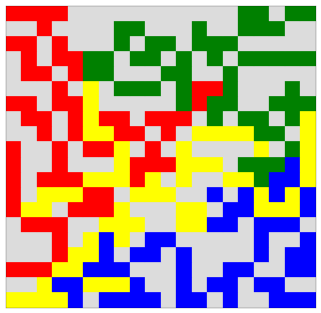

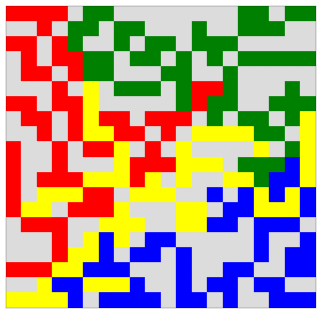

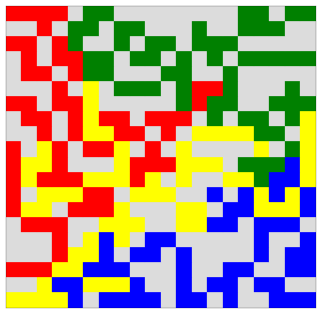

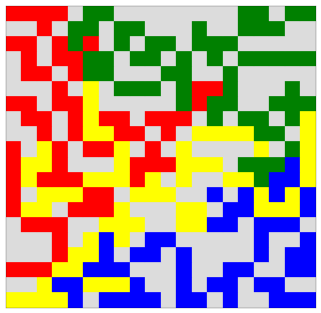

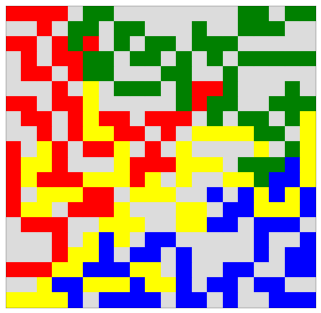

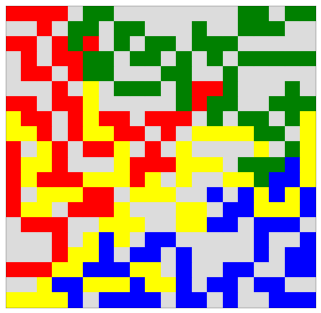

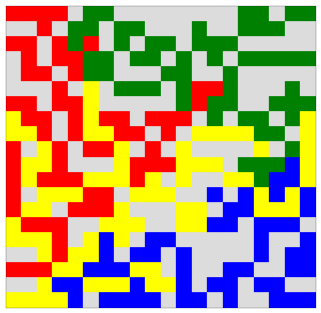

In [11]:
g2 = Game()
try:
    
    for m in ge.game.move_history:
        g2.make_move(m)
        g2.display()

except GameEnd:
    pass

ERROR:root:Line magic function `%lprun` not found.


Game upgrades:
    moves contains duplicates
        dict of dicts vs dict with tuple of (corner, piece) key. latter's probably faster

    Is it really important to get all with a corner or all with a piece fast? maybe cut one out to speed up overall
  

Performance Tuning:

1. Write Game Test compare valid 

In [ ]:
def get_avg_moves_per_game():
    
    products = []

    for i in range(100):

        if i > 0 and i % 10 == 0:
            print(i)

        product = get_moves_per_game()
        products.append(product)
        
def get_moves_per_game():
    ge = GameEngine()
    move_counts = []
    while True:
        try:
            player_id = ge.game.player_pointer
            moves = list(ge.game.get_players_moves(player_id))
            move_counts.append((player_id, len(moves)))
            ge.play_turn()

        except GameEnd:
            break

    ids, options = zip(*move_counts)
    options = [float(o) for o in options]
    product = np.product(options)
    return product

In [ ]:
def show_orientation(o):
    """displays an orientation"""
    board = Board()
    vis = BoardView()
    offset = Point(10, 10)

    for i, j in itertools.product(range(20), range(20)):
        p = Point(i, j)
        val = -1
        if i < 10:
            if j < 10:
                val = 1
            else:
                val = 0
        else:
            if j < 10:
                val = 2
        board.assign(p, val)
            
    corners = o.get_corners()

    for c in corners:
        board.assign(c.p2 + offset, 4)
    new_points = [p + offset for p in o.points]
    for p in new_points:
        board.assign(p, 3)

    board.assign(Point(-1, -1), 6)
    board.display()